challenge 1

In [1]:
pip install spotipy

     -------------------------------------- 246.2/246.2 KB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='71e2a339eae14ede8e6b632f84d97beb', client_secret='68d73ab4f6f8453f811a9b21c6418edb')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [27]:
artist_name = []
track_name=[]
track_popularity=[]
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
    

In [28]:
track_id

['6Sq7ltF9Qa7SNFBsV5Cogx',
 '4eHkG6yWQ4pD0zqVkV0R5a',
 '7fYRg3CEbk6rNCuzNzMT06',
 '0iwZSwPYSH1Sqg2BP4SSL8',
 '5CM4UuQ9Gnd6K2YyKGPMoK',
 '7niIWQiDqvFvyNtRJBgjIg',
 '2rurDawMfoKP4uHyb2kJBt',
 '6ZsEbj9OvoANL0wtIjJRq5',
 '1IHWl5LamUGEuP4ozKQSXZ',
 '4u2gL1g6AgF2vlAURETOXi',
 '6xGruZOHLs39ZbVccQTuPZ',
 '3vaf8OOVW0nU3vehNREhJb',
 '3F5CgOj3wFlRv51JsHbxhe',
 '0N0lD4pbaPN6xilBZhMSyH',
 '4LRPiXqCikLlN15c3yImP7',
 '5hhw7WkW1tJ5hFVEme6Mle',
 '0O6u0VJ46W86TxN9wgyqDj',
 '5HcV3YJu0u1PERen9uSV0T',
 '5Eax0qFko2dh7Rl2lYs3bx',
 '3B26XqOpSrxKSPKWJCVlwF',
 '1qEmFfgcLObUfQm0j1W2CK',
 '47TcNyFx6YGe7OKZHnOfFW',
 '5uU1uuyaUIBOiiUSQG7Wl3',
 '5Y6q6EOjle3Pd3hLQ5YijA',
 '4C6Uex2ILwJi9sZXRdmqXp',
 '2lGrMaDv56BVIxNrgT5GY7',
 '4h9wh7iOZ0GGn8QVp4RAOB',
 '1oslhN5RJTTfZw9qXvgwAg',
 '59nOXPmaKlBfGMDeOVGrIK',
 '1r6KsxoqWjyatwZcz3n2c4',
 '0hquQWY3xvYqN4qtiquniF',
 '1QYUchNFPJCk5knC37dTQg',
 '6Xom58OOXk2SoU711L2IXO',
 '51p7VjmLSJlZ85JGBJn977',
 '4cacyP5c3PMlfnyjpg13xW',
 '15tHQfwlhUJFTbuDXLtcXG',
 '3k3NWokhRRkEPhCzPmV8TW',
 

In [29]:
import pandas as pd
track_df = pd.DataFrame({'artist_name':artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,98,4q3ewBCX7sLwd24euuV69X
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,27rjDVGfZG4eorQwrZt2ZD
2,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,83,7CajNmpbOovFoOoasH2HaY
3,Brett Eldredge,It's the Most Wonderful Time of the Year,0iwZSwPYSH1Sqg2BP4SSL8,0,0qSX3s5pJnAlSsgsCne8Cz
4,Steve Lacy,Bad Habit,5CM4UuQ9Gnd6K2YyKGPMoK,91,57vWImR43h4CaDao012Ofp


In [30]:
## artists who performed the above tracks


artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [31]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,98,4q3ewBCX7sLwd24euuV69X,100,"[latin, reggaeton, trap latino]",54363258
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,27rjDVGfZG4eorQwrZt2ZD,23,[rwandan hip hop],7674
2,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,83,7CajNmpbOovFoOoasH2HaY,85,"[dance pop, edm, electro house, house, pop, pr...",23006901
3,Brett Eldredge,It's the Most Wonderful Time of the Year,0iwZSwPYSH1Sqg2BP4SSL8,0,0qSX3s5pJnAlSsgsCne8Cz,63,"[contemporary country, country, country road, ...",1407204
4,Steve Lacy,Bad Habit,5CM4UuQ9Gnd6K2YyKGPMoK,91,57vWImR43h4CaDao012Ofp,84,[afrofuturism],1916908


In [32]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,audio_features,6Sq7ltF9Qa7SNFBsV5Cogx,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,178567,4
1,0.521,0.683,5,-6.240,0,0.5010,0.1590,0.000000,0.1870,0.737,139.439,audio_features,4eHkG6yWQ4pD0zqVkV0R5a,spotify:track:4eHkG6yWQ4pD0zqVkV0R5a,https://api.spotify.com/v1/tracks/4eHkG6yWQ4pD...,https://api.spotify.com/v1/audio-analysis/4eHk...,161808,3
2,0.824,0.697,11,-4.869,0,0.0473,0.1580,0.000041,0.0770,0.757,99.988,audio_features,7fYRg3CEbk6rNCuzNzMT06,spotify:track:7fYRg3CEbk6rNCuzNzMT06,https://api.spotify.com/v1/tracks/7fYRg3CEbk6r...,https://api.spotify.com/v1/audio-analysis/7fYR...,214460,4
3,0.359,0.719,1,-5.266,1,0.0635,0.3990,0.000000,0.2300,0.692,195.075,audio_features,0iwZSwPYSH1Sqg2BP4SSL8,spotify:track:0iwZSwPYSH1Sqg2BP4SSL8,https://api.spotify.com/v1/tracks/0iwZSwPYSH1S...,https://api.spotify.com/v1/audio-analysis/0iwZ...,177108,3
4,0.686,0.507,1,-7.097,1,0.0357,0.6260,0.000075,0.3830,0.690,168.955,audio_features,5CM4UuQ9Gnd6K2YyKGPMoK,spotify:track:5CM4UuQ9Gnd6K2YyKGPMoK,https://api.spotify.com/v1/tracks/5CM4UuQ9Gnd6...,https://api.spotify.com/v1/audio-analysis/5CM4...,232115,4


In [33]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      989 non-null    float64
 1   energy            989 non-null    float64
 2   loudness          989 non-null    float64
 3   speechiness       989 no

In [34]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)


,track_name,artist_name
62,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap
0,Me Porto Bonito,Bad Bunny
8,Tití Me Preguntó,Bad Bunny
18,Efecto,Bad Bunny
14,As It Was,Harry Styles
10,Glimpse of Us,Joji
36,Ojitos Lindos,Bad Bunny
32,Moscow Mule,Bad Bunny
88,DESPECHÁ,ROSALÍA
50,PROVENZA,KAROL G


In [36]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
980,101959046,90,Ed Sheeran,"['pop', 'uk pop']"
523,101959032,90,Ed Sheeran,"['pop', 'uk pop']"
242,68704759,88,Billie Eilish,"['art pop', 'electropop', 'pop']"
126,68704757,88,Billie Eilish,"['art pop', 'electropop', 'pop']"
858,66745482,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
670,66745481,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
312,66745477,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
92,66745475,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
12,66745474,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
558,57609271,93,Taylor Swift,['pop']


In [17]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                     156
progressive house       139
trance                  126
uplifting trance        107
progressive trance       93
rap                      91
pop dance                82
edm                      80
dance pop                78
contemporary country     66
hip hop                  52
rock                     50
mellow gold              48
art rock                 48
trap                     47
folk rock                45
new wave pop             43
power pop                43
pub rock                 43
pop rap                  31
dtype: int64

Text(0.5, 1.0, 'Top genres')

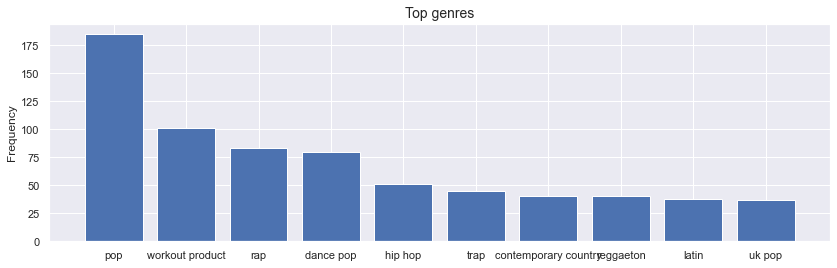

In [37]:
#Visualising the genres
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [38]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Workout Music,workout product
2,Drake,rap
3,Dua Lipa,dance pop
4,Drake,hip hop
5,Lil Uzi Vert,trap
6,Luke Bryan,contemporary country
7,Bad Bunny,reggaeton
8,Bad Bunny,latin
9,Ed Sheeran,uk pop


In [39]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,As It Was,96,Harry Styles,pop
1,Blinding Lights (Workout Mix),10,Workout Music,workout product
2,Jimmy Cooks (feat. 21 Savage),91,Drake,rap
3,Left and Right (Feat. Jung Kook of BTS),94,Charlie Puth,dance pop
4,Jimmy Cooks (feat. 21 Savage),91,Drake,hip hop
5,WAIT FOR U (feat. Drake & Tems),89,Future,trap
6,You Proof,85,Morgan Wallen,contemporary country
7,Me Porto Bonito,98,Bad Bunny,reggaeton
8,Me Porto Bonito,98,Bad Bunny,latin
9,Bam Bam (feat. Ed Sheeran),88,Camila Cabello,uk pop


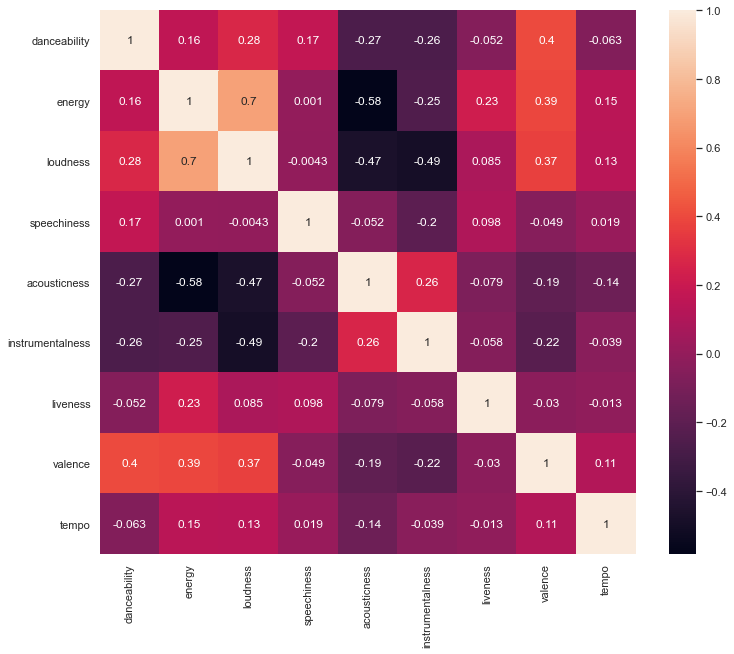

In [40]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

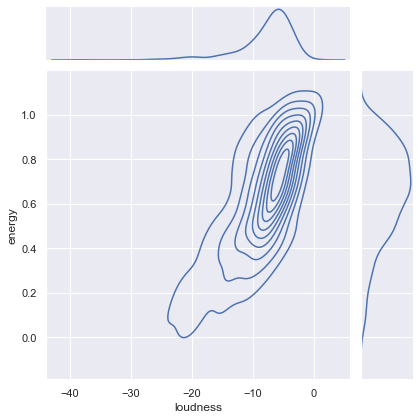

In [41]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

In [24]:
pip install plotly

     ---------------------------------------- 15.2/15.2 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [42]:
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.734090  0.670910     0.096237      0.224642          0.010100   
1      0.643215  0.653315     0.111921      0.231305          0.148461   

   liveness   valence  
0  0.190752  0.578664  
1  0.188266  0.520272  


In [43]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

Phil Collins One More Night - 2016 Remaster
Elton John Burn Down The Mission
Yusuf / Cat Stevens Wild World
Fleetwood Mac Gypsy
Neil Diamond Forever In Blue Jeans
Maroon 5 Payphone - Cutmore Remix
Jon Bellion All Time Low
Twenty One Pilots Saturday
One Direction Story of My Life
STARSET INFECTED
Eminem Venom - Music From The Motion Picture
Fleetwood Mac Dreams - 2004 Remaster
Wiz Khalifa Pull Up (feat. Lil Uzi Vert)
OneRepublic Someday
Elton John Bennie And The Jets - Remastered 2014
The Score Head Up
Chicago Hard to Say I'm Sorry / Get Away - 2006 Remaster
Yusuf / Cat Stevens The Wind - Remastered 2021
Supertramp The Logical Song - Remastered 2010
A$AP Mob RAF (feat. A$AP Rocky, Playboi Carti, Quavo, Lil Uzi Vert & Frank Ocean)
Elton John Take Me To The Pilot
David Guetta Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afrojack) - DJ LBR Remix
Little Mix Woman Like Me (feat. Nicki Minaj)
Rita Ora Your Song
Lady Gaga Applause
J Balvin Mi Gente
Lionel Richie All Night Long (All Night)
Juice W